In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that plots are shown and embedded within the jupyter notebook itself
%matplotlib inline

In [2]:
#Set the display of rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Read application_data dataset
application_data_df = pd.read_csv(r"C:\Users\Santhosh\Downloads\Credit EDA Case Study\application_data.csv")

In [4]:
#Find the total number of rows and columns (i.e. from shape)
application_data_df.shape

(307511, 122)

#### Shape of dataset at this stage: Rows: 307511, Columns: 122

In [5]:
#Find the information of the application_data dataset
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### There are 65 columns of float type, 41 columns of int type and 16 columns are of object type.  

In [6]:
# Fetch the columns of object data type from application_data_df dataframe
list(application_data_df.select_dtypes(['object']).columns)

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [7]:
#Retrieve the random 10 rows from the application_data_df dataframe
application_data_df.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
82653,195856,0,Cash loans,F,N,Y,0,67500.0,71955.0,7137.0,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010500,-19810,-5586,-5042.0,-3360,NaN,1,1,1,1,0,0,High skill tech staff,2.0,3,3,WEDNESDAY,9,0,0,0,0,0,0,Government,NaN,0.606675,0.389339,0.0278,0.0471,0.9886,0.8436,0.0039,0.00,0.1034,0.0833,0.1250,0.0699,0.0227,0.0286,0.0000,0.0470,0.0284,0.0489,0.9886,0.8497,0.0039,0.0000,0.1034,0.0833,0.1250,0.0715,0.0248,0.0298,0.0000,0.0498,0.0281,0.0471,0.9886,0.8457,0.0039,0.00,0.1034,0.0833,0.1250,0.0711,0.0231,0.0292,0.0000,0.0480,reg oper account,block of flats,0.0246,"Stone, brick",No,0.0,0.0,0.0,0.0,-1919.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
55288,164062,0,Cash loans,F,N,Y,2,112500.0,702000.0,27967.5,702000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.020713,-14136,-5387,-8019.0,-4638,NaN,1,1,0,1,1,0,Core staff,4.0,3,2,SATURDAY,9,0,0,0,0,0,0,Kindergarten,NaN,0.605918,0.743559,0.0629,0.0860,0.9781,0.7008,0.0619,0.00,0.1379,0.1667,0.2083,0.0301,0.0471,0.0537,0.0193,0.0391,0.0641,0.0893,0.9782,0.7125,0.0625,0.0000,0.1379,0.1667,0.2083,0.0308,0.0514,0.0560,0.0195,0.0414,0.0635,0.0860,0.9781,0.7048,0.0623,0.00,0.1379,0.1667,0.2083,0.0307,0.0479,0.0547,0.0194,0.0399,reg oper account,block of flats,0.0508,"Stone, brick",No,0.0,0.0,0.0,0.0,-3038.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
31367,136393,0,Cash loans,F,N,Y,0,225000.0,1579477.5,54900.0,1363500.0,Unaccompanied,State servant,Secondary / secondary special,Separated,House / apartment,0.024610,-19690,-12423,-7017.0,-3238,NaN,1,1,0,1,1,1,Medicine staff,1.0,2,2,MONDAY,14,0,0,0,0,0,0,Medicine,0.732330,0.544309,0.234015,0.0371,0.0236,0.9737,NaN,NaN,0.00,0.0690,0.1667,NaN,0.0243,NaN,0.0285,NaN,0.0151,0.0378,0.02

In [30]:
# Check how many columns have null values greater than or equal to 30%
null_cols=application_data_df.isnull().sum()
null_cols=null_cols[null_cols.values>=(0.3*len(null_cols))]
len(null_cols)

64

#### 64 columns are having null values greater than or equal to 30% in the dataset

In [31]:
# Collecting the columns names having >= 30% in a list
null_cols = list(null_cols[null_cols.values >= 0.3].index)

In [32]:
# Removing those 64 columns
application_data_df.drop(labels=null_cols,axis=1,inplace=True)

In [33]:
# Check the percentage of null value columns from application_data_df dataset
application_data_df.isnull().sum() / len(application_data_df) * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


#### AMT_ANNUITY column is having few null values. 

In [43]:
application_data_df.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

#### AMT_ANNUITY is having data type of float and that is correct.

In [45]:
application_data_df.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

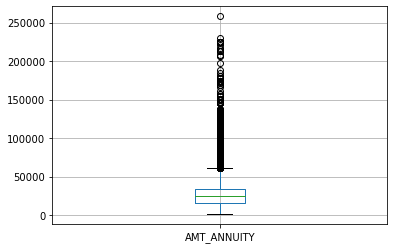

In [47]:
# To check if there are any outliers in AMT_ANNUITY using box plot
application_data_df.boxplot(column=['AMT_ANNUITY']);

#### As there is an outlier, let me not fill the missing values using mean.  I will use median to fill those missing values

In [36]:
# Find the median value of AMT_ANNUITY column in application_data_df dataset
amt_annuity_med_value=application_data_df['AMT_ANNUITY'].median()
amt_annuity_med_value

24903.0

#### Median value dervied for AMT_ANNUITY is 24903.

In [37]:
# Impute the missing values in AMT_ANNUITY column with median value
application_data_df.loc[application_data_df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=amt_annuity_med_value

In [55]:
# Check columns having null values 
application_data_df.isnull().sum()/len(application_data_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [57]:
# Check the sample of 5 rows from CNT_FAM_MEMBERS column
application_data_df.CNT_FAM_MEMBERS.sample(5)

86472     2.0
97447     2.0
291346    2.0
298086    2.0
288498    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

#### Data type of CNT_FAM_MEMBERS is float64 and that is correct.

In [60]:
#Describe the CNT_FAM_MEMBERS column
application_data_df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

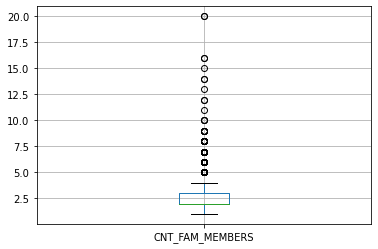

In [63]:
# Check the outliers from CNT_FAM_MEMBERS column by drawing the box plot
application_data_df.boxplot(column='CNT_FAM_MEMBERS');

#### As there is an outlier, I will use median instead of mode for imputatin

In [66]:
# Dervie the median for CNT_FAM_MEMBERS column
cnt_fam_members_median = application_data_df.CNT_FAM_MEMBERS.median()
cnt_fam_members_median

2.0

#### Median value for CNT_FAM_MEMBERS column is 2.0.  Impute this value for all missing values

In [71]:
# Impute the missing values in CNT_FAM_MEMBERS with median value
application_data_df.loc[application_data_df['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS'] = cnt_fam_members_median 

In [72]:
# Check again for percentages of null values in columns
application_data_df.isnull().sum() / len(application_data_df) * 100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


#### All columns are now having zero null values

In [100]:
# Removing rows having null values greater than or equal to 30%
empty_rows = application_data_df.isnull().sum(axis=1)
empty_rows=list(empty_rows[empty_rows.values>=0.3*len(application_data_df)].index)
application_data_df.drop(labels=empty_rows,axis=0,inplace=True)
print(len(empty_rows))

0


In [101]:
# Remove unwanted columns from application_data_df dataset

unwanted_columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data_df.drop(labels=unwanted_columns,axis=1,inplace=True)

In [102]:
application_data_df.shape

(307511, 28)

#### After removing the unwanted columns, application_data_df dataset is having 307511 rows and 28 columns

In [103]:
# Fetch sample rows to see if they have Not Available values
application_data_df.sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
242089,380286,0,Cash loans,F,N,Y,0,337500.0,679500.0,30834.0,Pensioner,Lower secondary,Married,Municipal apartment,0.006207,-22230,365243,-7974.0,-4422,TUESDAY,11,0,0,0,0,0,0,XNA
248882,387922,0,Cash loans,M,Y,Y,1,292500.0,1076247.0,43965.0,Commercial associate,Higher education,Married,House / apartment,0.009334,-9969,-1303,-9891.0,-2589,TUESDAY,13,0,0,0,0,0,0,Business Entity Type 3
259597,400423,0,Cash loans,F,N,N,0,90000.0,675000.0,28597.5,Working,Secondary / secondary special,Married,House / apartment,0.010643,-14103,-1066,-2015.0,-5085,MONDAY,14,0,0,0,0,1,1,Self-employed
281962,426595,0,Cash loans,F,N,Y,0,157500.0,1560726.0,41301.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.014464,-19532,-245,-3487.0,-3056,SATURDAY,5,0,0,0,0,0,0,Kindergarten
253832,393717,0,Cash loans,M,N,Y,0,157500.0,755190.0,32125.5,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-19554,-1097,-12126.0,-2594,TUESDAY,11,0,0,0,0,0,0,Business Entity Type 1
89407,203801,0,Cash loans,F,N,N,0,270000.0,728460.0,38938.5,Pensioner,Higher education,Widow,House / apartment,0.020713,-23421,365243,-1685.0,-4686,MONDAY,11,0,0,0,0,0,0,XNA
92835,207791,0,Cash loans,M,Y,Y,0,135000.0,1111500.0,49711.5,Working,Secondary / secondary special,Married,House / apartment,0.005144,-18820,-3185,-5210.0,-2367,SATURDAY,11,0,0,0,0,0,0,Other
265160,407085,1,Cash loans,F,N,Y,0,112500.0,526491.0,18126.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.024610,-21775,365243,-12009.0,-4821,TUESDAY,11,0,0,0,0,0,0,XNA
144395,267429,0,Cash loans,F,N,N,0,90000.0,284400.0,16011.0,Working,Secondary / secondary special,Married,House / apartment,0.025164,-18851,-2505,-49.0,-2386,THURSDAY,14,0,0,0,0,0,0,Transport: type 4
28147,132714,0,Cash loans,F,N,Y,0,76500.0,1102500.0,36436.5,Working,Secondary / secondary special,Married,House / apartment,0.020713,-17565,-848,-5123.0,-1099,THURSDAY,8,0,0,0,0,0,0,Business Entity Type 1


In [118]:
# To check columns having values 'XNA' which means Not Available
application_data_df.isin(['XNA']).any()

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                     True
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
REG_REGION_NOT_LIVE_REGION     False
REG_REGION_NOT_WORK_REGION     False
LIVE_REGION_NOT_WORK_REGION    False
REG_CITY_NOT_LIVE_CITY         False
REG_CITY_NOT_WORK_CITY         False
LIVE_CITY_NOT_WORK_CITY        False
O

#### CODE_GENDER and ORGANIZATION_TYPE columns have XNA values in them                  

In [119]:
# Find the shape of CODE_GENDER column with 'XNA' values
application_data_df[application_data_df['CODE_GENDER']=='XNA'].shape

(4, 28)

#### There are four rows with in CODE_GENDER column with XNA values

In [120]:
# Find the shape of ORGANIZATION_TYPE column with 'XNA' values
application_data_df[application_data_df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

#### There are 55374 rows with in ORGANIZATION_TYPE column with 'XNA' values

In [121]:
# Find the value_counts of CODE_GENDER column to check the number of females and males
application_data_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Females are more than Males.  Only four rows are with 'XNA' values.  So, replacing these with Female does not have any impact

In [123]:
# Update 'XNA' values with with "F" in CODE_GENDER column in application_data_df dataset
application_data_df.loc[application_data_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [140]:
# Find the percentage of rows having 'XNA' in ORGANIZATION_TYPE column
round(application_data_df.ORGANIZATION_TYPE.value_counts()['XNA']/len(application_data_df) * 100,2)

18.01

In [142]:
# As the percentage of 'XNA' values is at 18%, dropping these rows from application_data_df dataset will not have much impact.
application_data_df=application_data_df.drop(application_data_df.loc[application_data_df['ORGANIZATION_TYPE']=='XNA'].index)
application_data_df[application_data_df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

### All the 'XNA' values from ORGANIZATION_TYPE column are removed.

In [146]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_data_df[numeric_columns]=application_data_df[numeric_columns].apply(pd.to_numeric)
application_data_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


#### Derived Metrics

In [148]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data_df['AMT_INCOME_RANGE']=pd.cut(application_data_df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [149]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data_df['AMT_CREDIT_RANGE']=pd.cut(application_data_df['AMT_CREDIT'],bins=bins,labels=slots)

In [151]:
# Divide the dataset into two datasets one with target=1 (client with payment difficulties) and target=0 (all other)

target0_df=application_data_df.loc[application_data_df["TARGET"]==0]
target1_df=application_data_df.loc[application_data_df["TARGET"]==1]

In [152]:
# Derive the shape of target-0 customers
target0_df.shape

(230302, 30)

In [153]:
# Derive the shape of target-1 customers
target1_df.shape

(21835, 30)

In [154]:
application_data_df.shape

(252137, 30)

In [155]:
# Calculating Imbalance percentage
round(len(target0_df)/len(target1_df),2)

10.55

#### Imbalance ratio between target-0 and target-1 is 10.55%

#### Univariate analysis for categories
#### Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)

In [158]:
# Plotting in logarithmic scale

def univariate_plot(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='Blues') 
        
    plt.show()

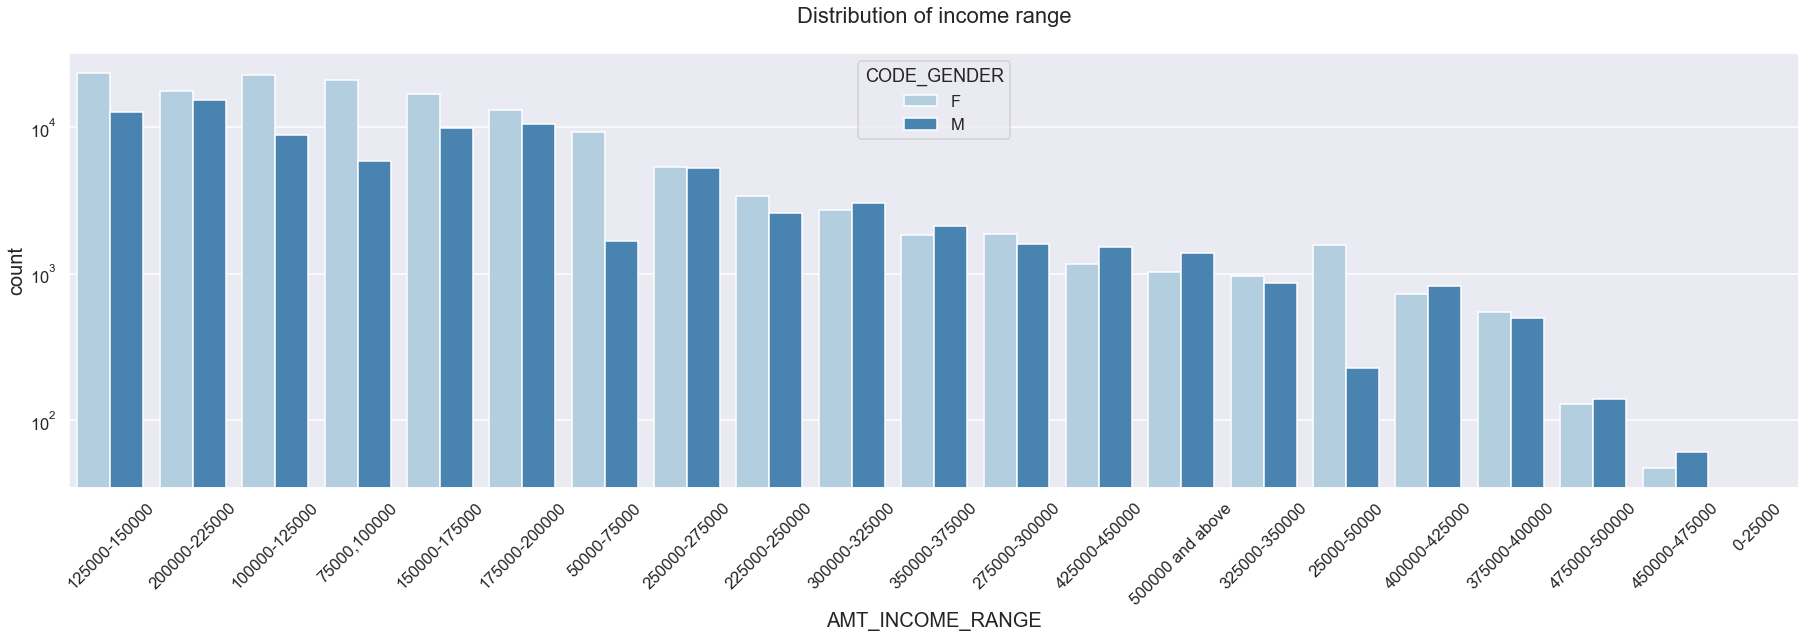

In [159]:
# PLotting for income range
univariate_plot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

#### Graph Analysis
Observations from the above graph.

* Female counts are higher than male.
* Income range from 100000 to 200000 is having more number of credits.
* Females are more than male in having credits for the range 100000 to 200000
* Count is very less for income range 400000 and above.

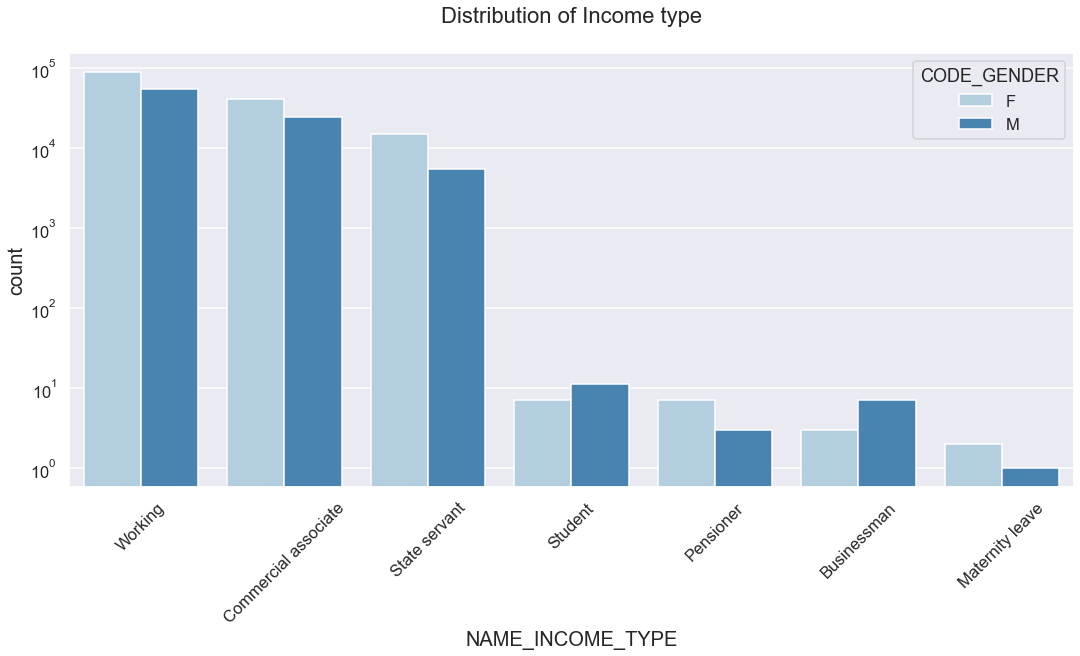

In [163]:
# Plotting for Income type
univariate_plot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Graph Analysis
Observations from the above graph.

* For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
* For income type ‘working’, ’commercial associate’, and ‘State Servant’, Females are having more number of credits than male.
* Credits are less for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

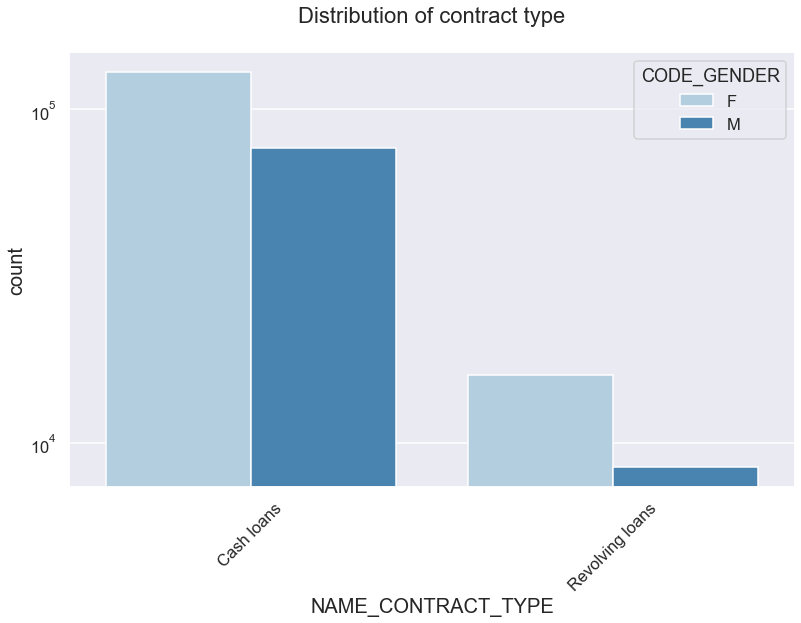

In [166]:
# Plotting for Contract type
univariate_plot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

#### Graph Analysis
Observations from the above graph:

* For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
* For this also Female is leading for applying credits.

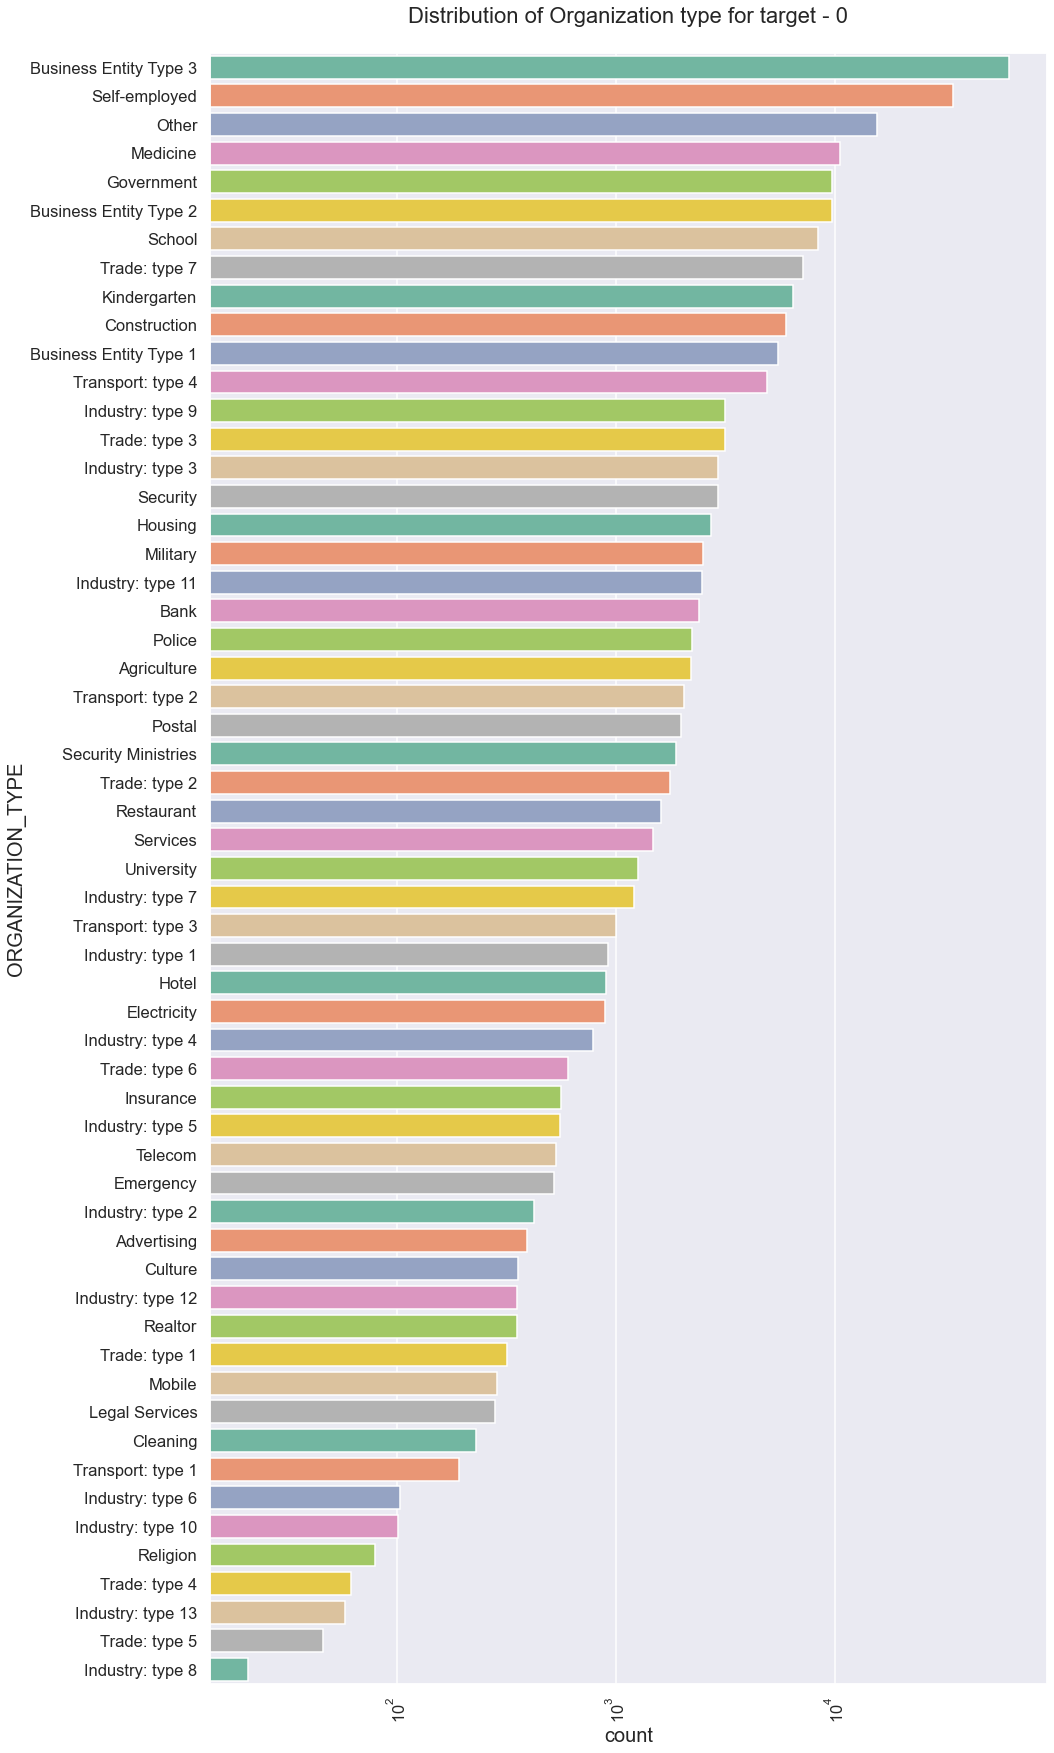

In [170]:
# Plotting for Organization type in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='Set2')

plt.show()

#### Graph Analysis
Observations from the above graph:

* Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
* Less clients are from Industry type 8,type 6, type 10, type 13, religion and trade type 5, type 4.

#### Categoroical Univariate Analysis in logarithmic scale for target=1 (client with payment difficulties)

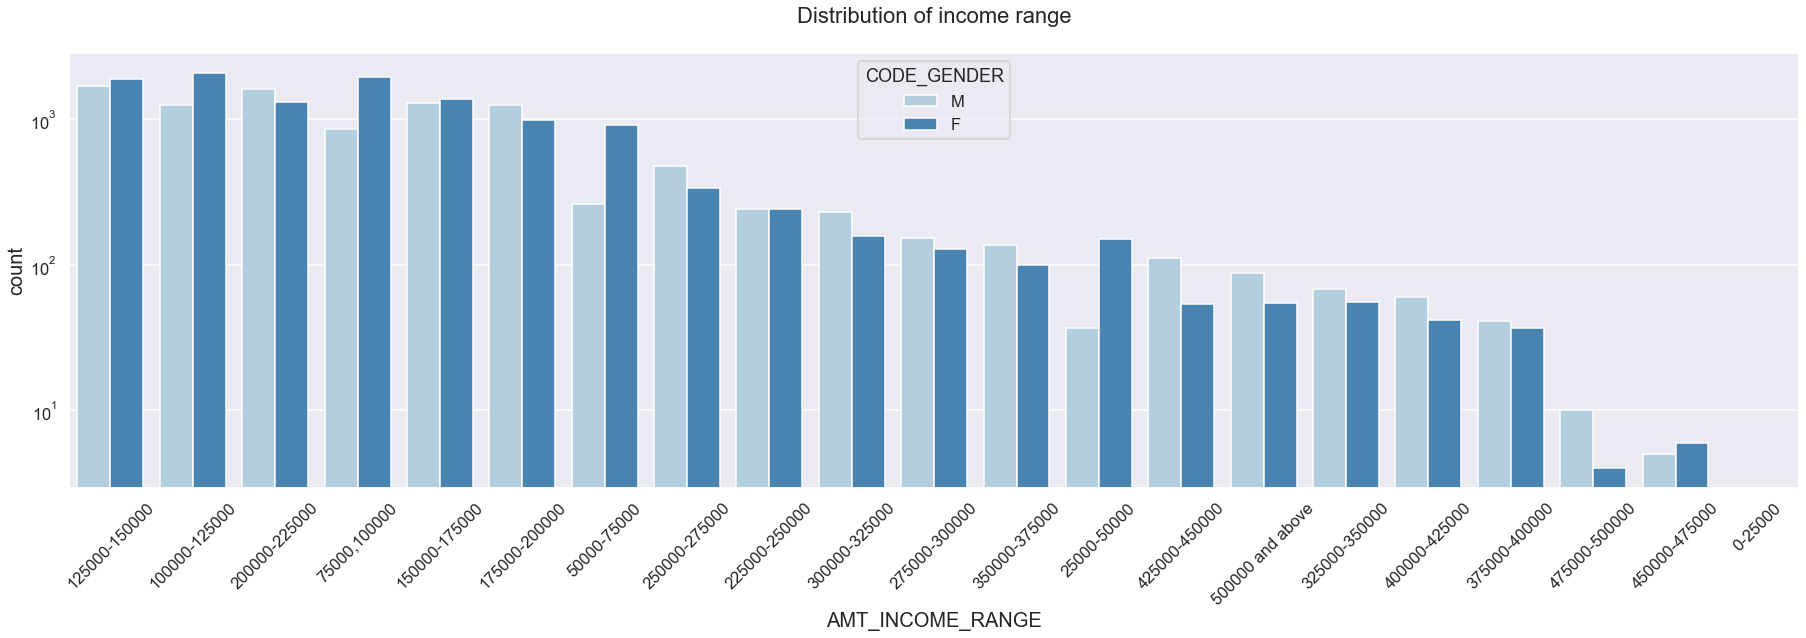

In [171]:
# PLotting for income range

univariate_plot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

#### Graph Analysis
Observations from the above graph.

* Male counts are higher than female.
* Income range from 100000 to 200000 is having more number of credits.
* This graph show that males are more than female in having credits for that range.
* Very less count for income range 400000 and above.

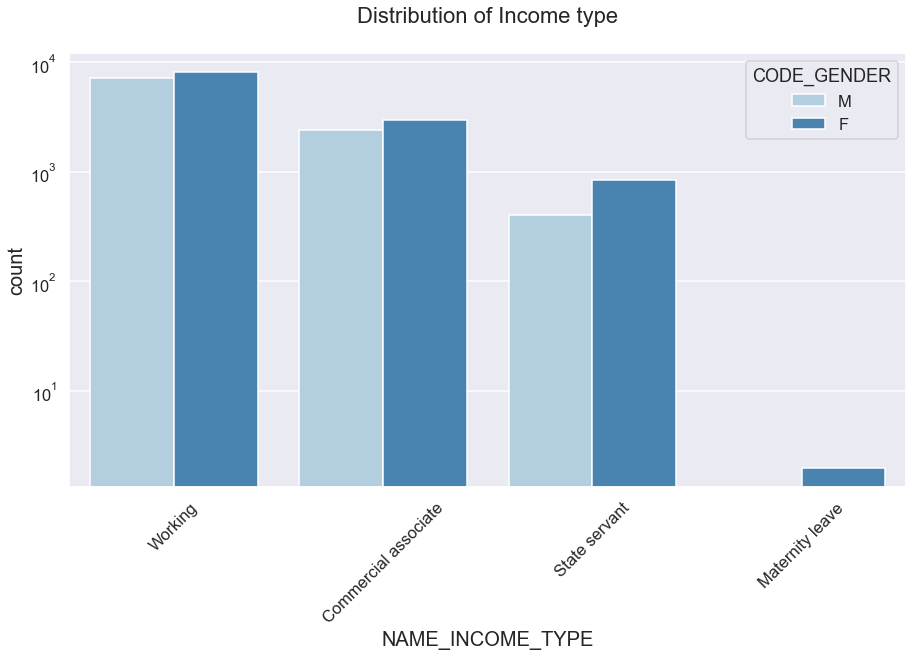

In [177]:
# Plotting for Income type
univariate_plot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Graph Analysis
Observations from the above graph:

* For income type ‘Working’, ’Commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
* For this Females are having more number of credits than male.
* Less number of credits are for income type ‘Maternity leave’.
* For type 1: There is no income type for ‘Student’, ’Pensioner’ and ‘Businessman’ which means they don’t do any late payments.

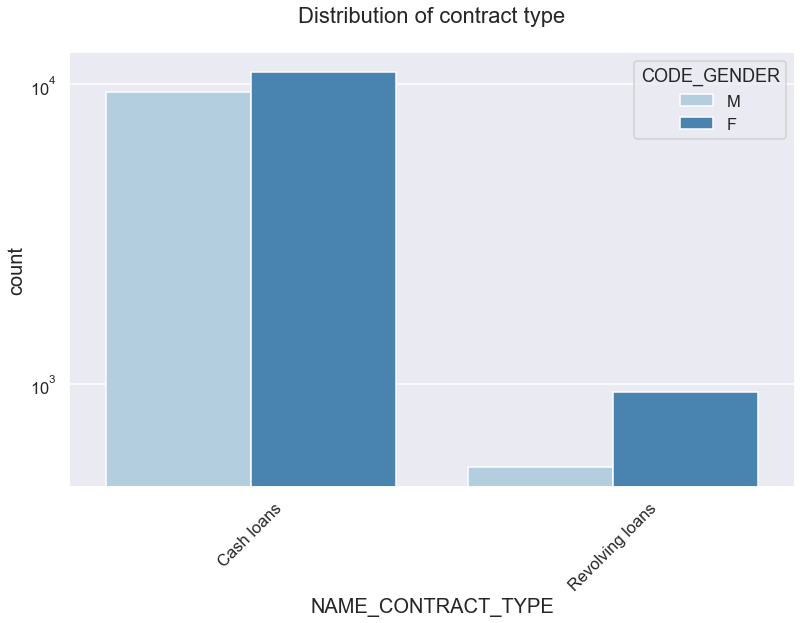

In [179]:
# Plotting for Contract type
univariate_plot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

#### Graph Analysis
Observations from the above graph:

* For contract type, ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
* Female is leading for applying credits.
* For type 1: there is only Female Revolving loans.

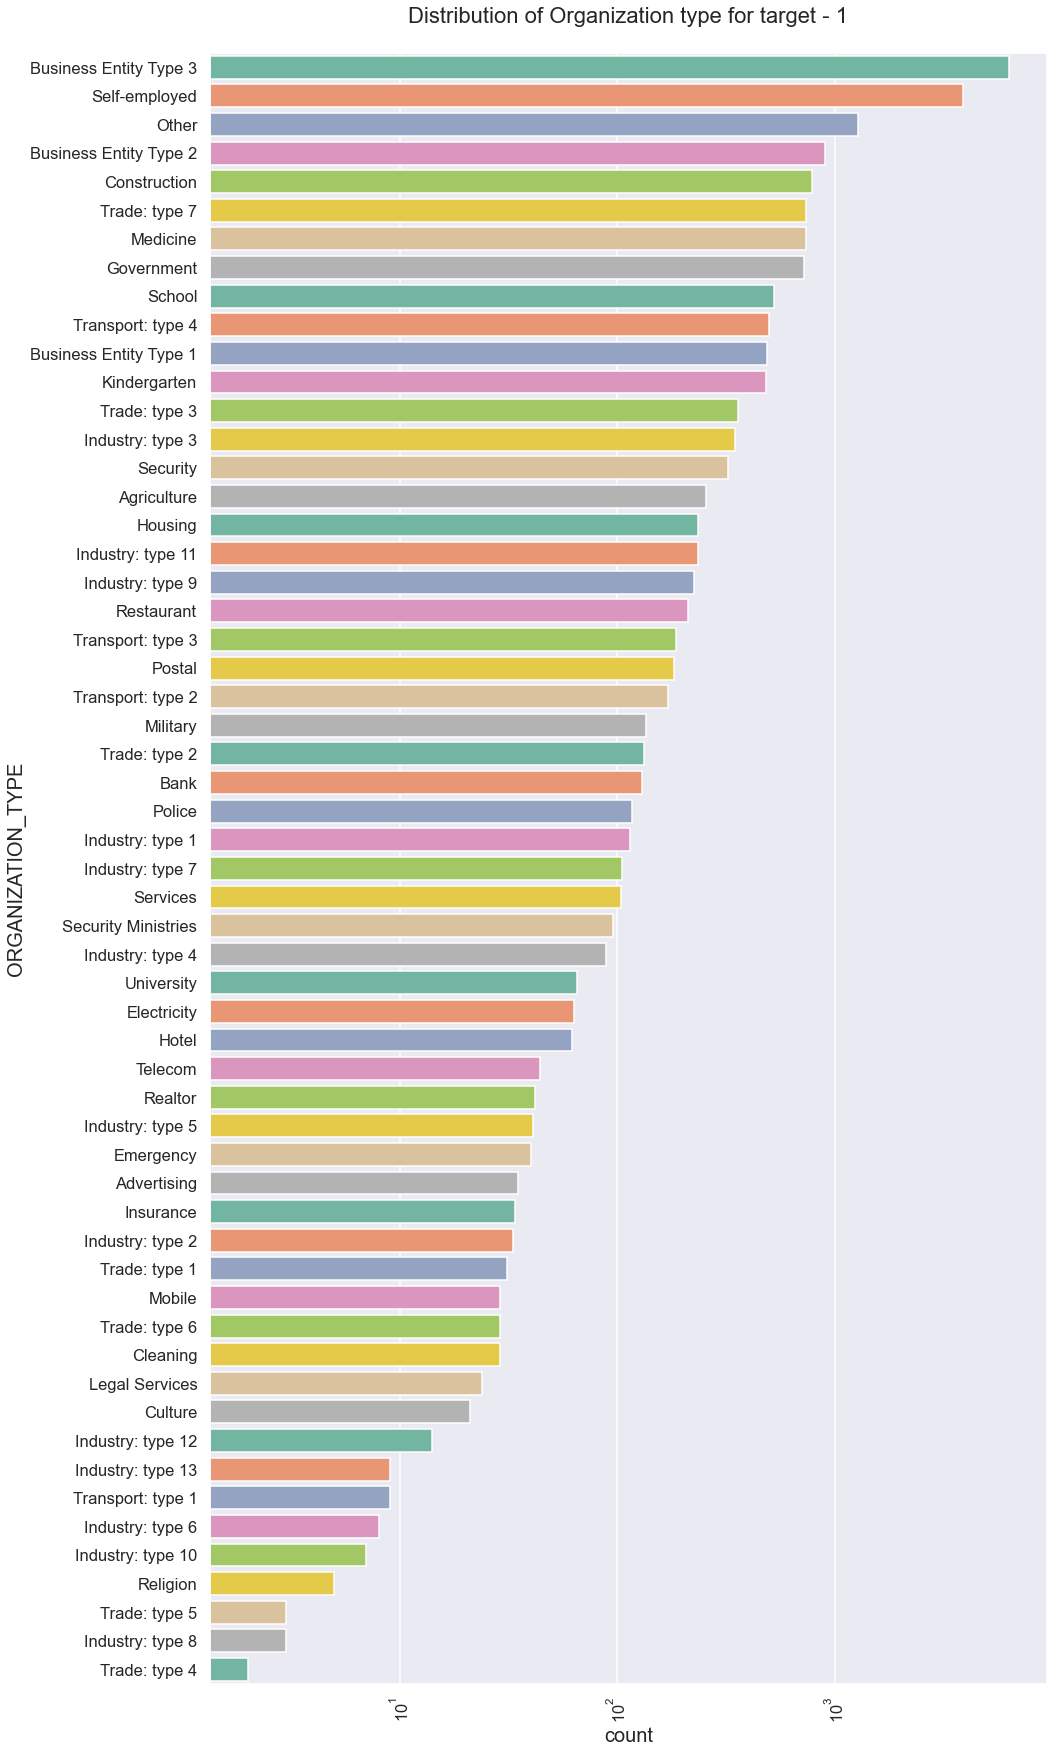

In [181]:
# Plotting for Organization type

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_df,y='ORGANIZATION_TYPE',order=target1_df['ORGANIZATION_TYPE'].value_counts().index,palette='Set2')

plt.show()

#### Graph Analysis
Observations from the above graph:

* Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’, ‘Self employed’, ‘Other’, and 'Business entity Type 2'.
* Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.

In [182]:
# Finding correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [183]:
# Correlation for target 0
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [184]:
# Correlation for target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [187]:
# Plotting the above correlation with heat map

# Set figure size

def targets_correlation(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="Blues",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()


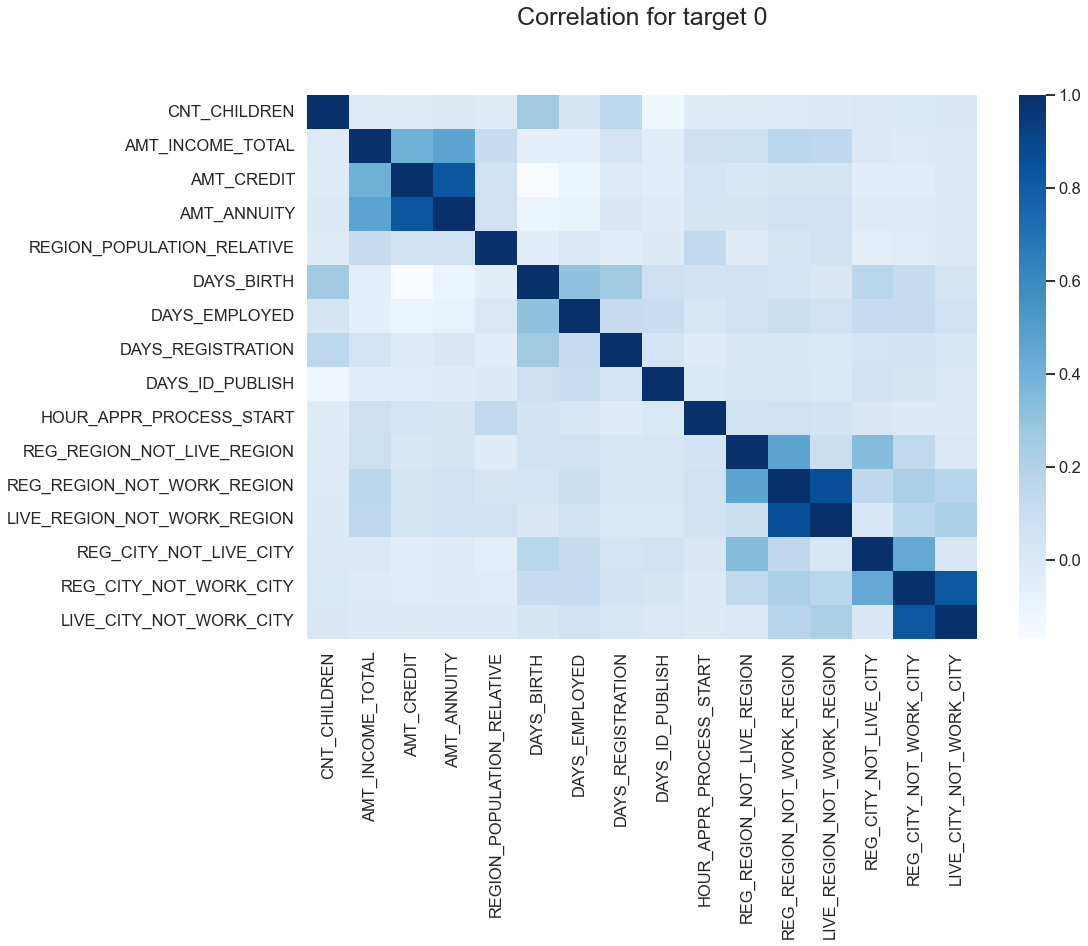

In [188]:
# For Target 0
targets_correlation(data=target0,title='Correlation for target 0')

#### Graph Analysis
Observations that can be derived from the above correlation heatmap are: 

* Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
* Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
* Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
* Less children client are in densely populated area.
* Credit amount is higher in densely populated area.
* Income is also higher in densely populated area.

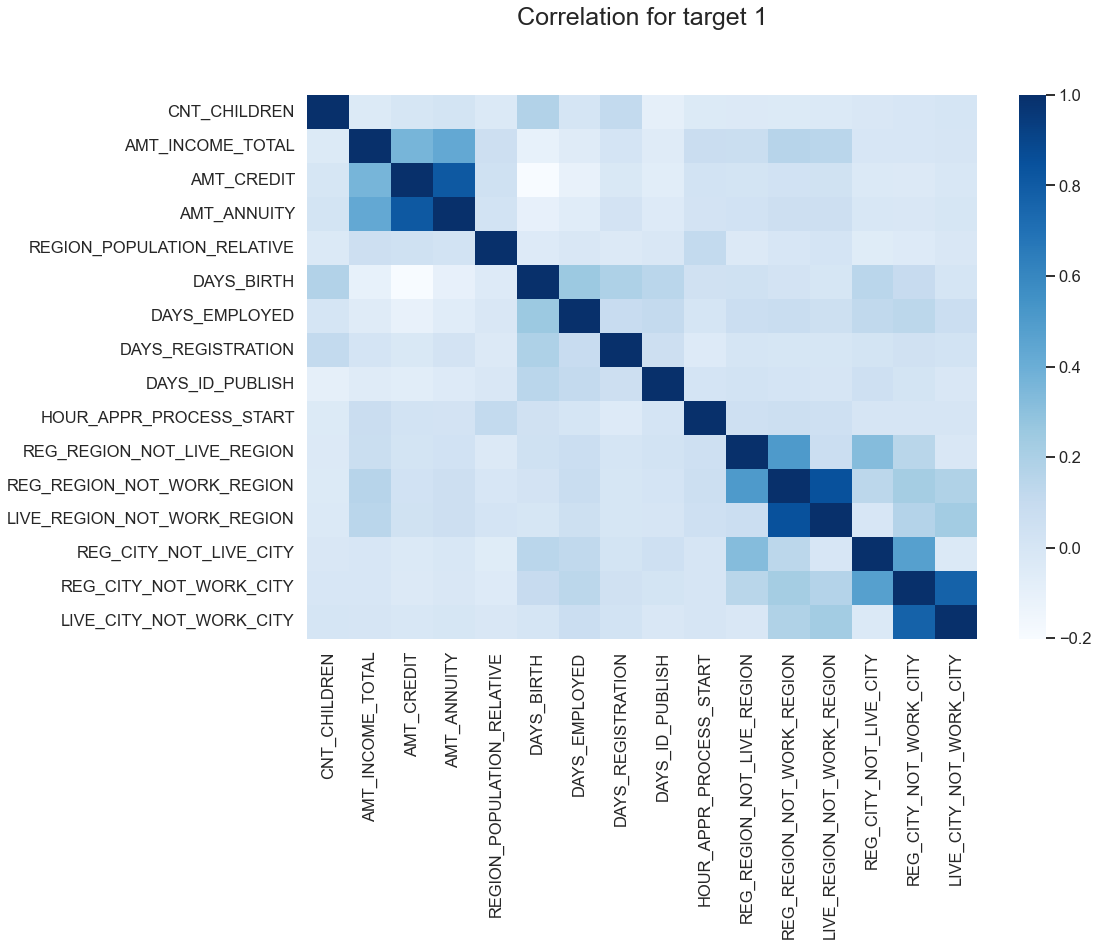

In [190]:
# For Target 1
targets_correlation(data=target1,title='Correlation for target 1')

#### Graph Analysis
Observations from the above heat map for Target 1 is as follows: 

* The client's permanent address does not match contact address are having less children and vice-versa
* The client's permanent address does not match work address are having less children and vice-versa

#### Univariate analysis for variables

In [209]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data = data, y=col,orient='v')
    plt.show()

#### For Target 0 - Finding any outliers

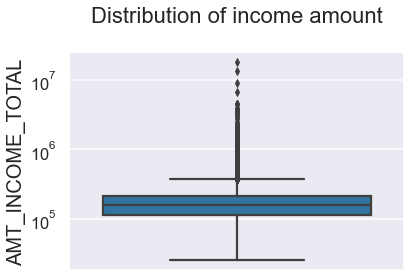

In [210]:
# Distribution of income amount
univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Graph Analysis
Observation from the above graph:

* Outliers are noticed in income amount.
* Third quartile is very slim for income amount.

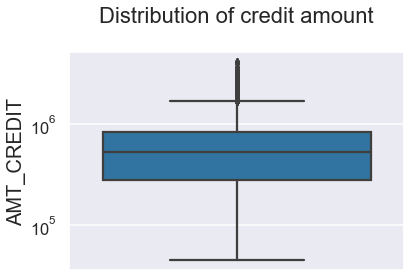

In [211]:
# Disrtibution of credit amount
univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

#### Graph Analysis
Observations from the above graph:

* Outliers are noticed in credit amount.
* First quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

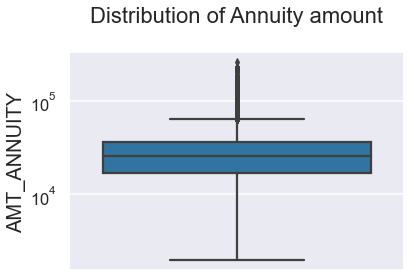

In [212]:
# Distribution of anuuity amount
univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Graph Analysis
Observations from the above graph:

* Outliers are noticed in annuity amount.
* First quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

#### For Target 1 - Finding any outliers

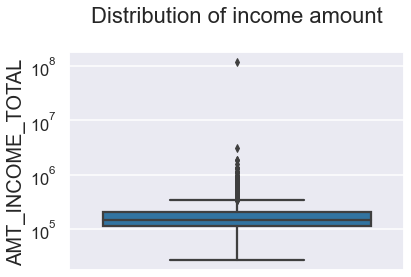

In [214]:
# Distribution of income amount
univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

#### Graph Analysis
Observations from the above graph:

* Outliers are noticed in income amount.
* First quartiles is very slim for income amount.
* Most of the clients of income are present in third quartile.

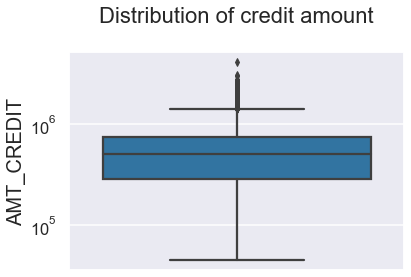

In [215]:
# Distribution of credit amount
univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')

#### Graph Analysis
Observations from the above graph are:

* Outliers are noticed in credit amount.
* The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

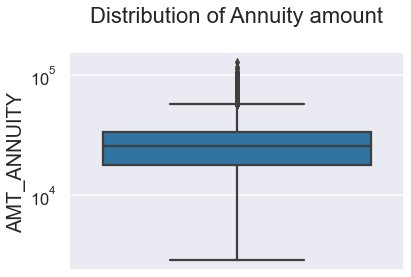

In [216]:
# Distribution of Annuity amount
univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Graph Analysis
Observations from the above graph are:

* Outliers are noticed in annuity amount.
* The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

#### Bivariate analysis for numerical variables

#### For Target 0

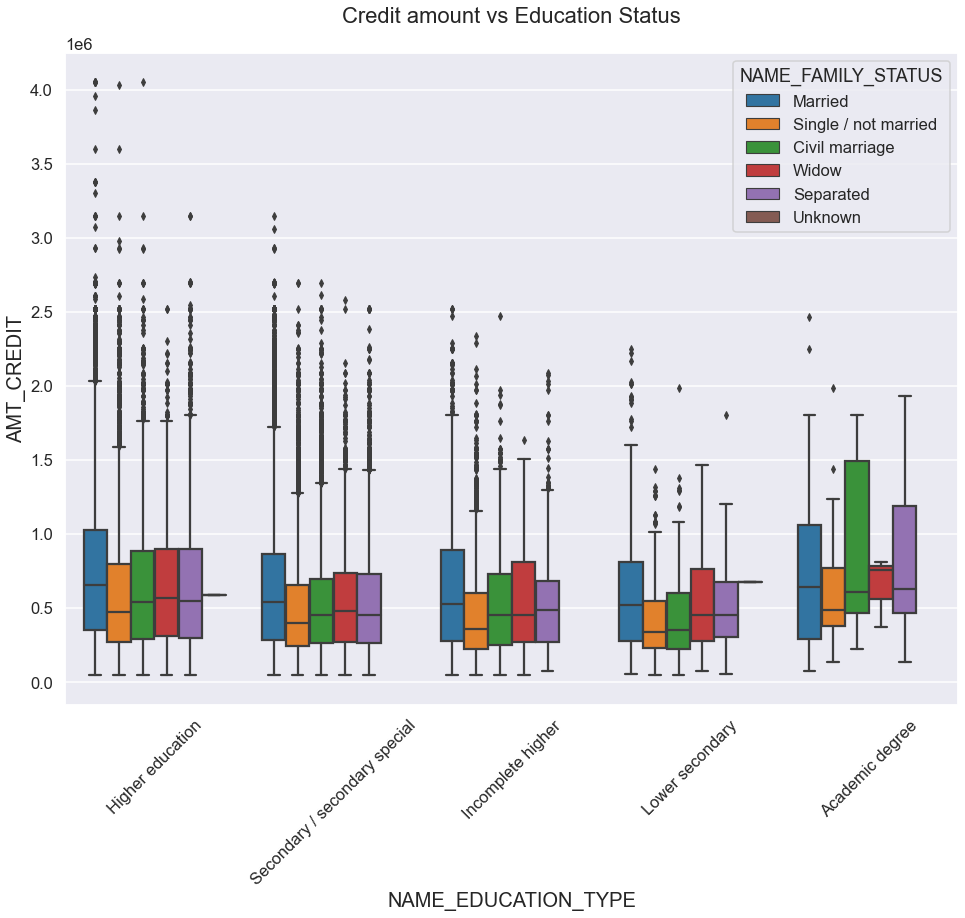

In [217]:
# Box plotting for Credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Graph Analysis
Observations from above graph are:
    
* Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
* Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
* Civil marriage for Academic degree is having most of the credits in the third quartile.

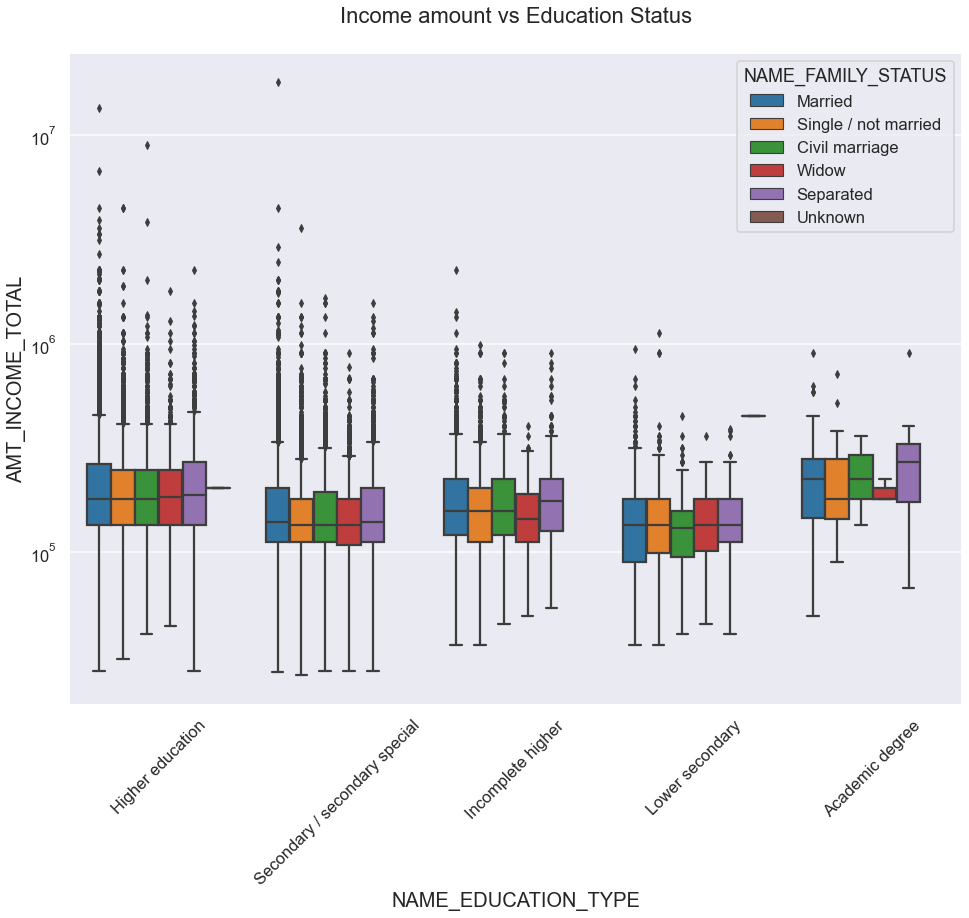

In [218]:
# Box plotting for Income amount in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Graph Analysis
Observations from the above graph are:
    
* 'Higher education' in the income amount is mostly equal with family status. It does contain many outliers. 
* Less outliers are having for Academic degree but there income amount is little higher that Higher education.
* Lower secondary of civil marriage family status are having less income amount than others.

#### Target 1

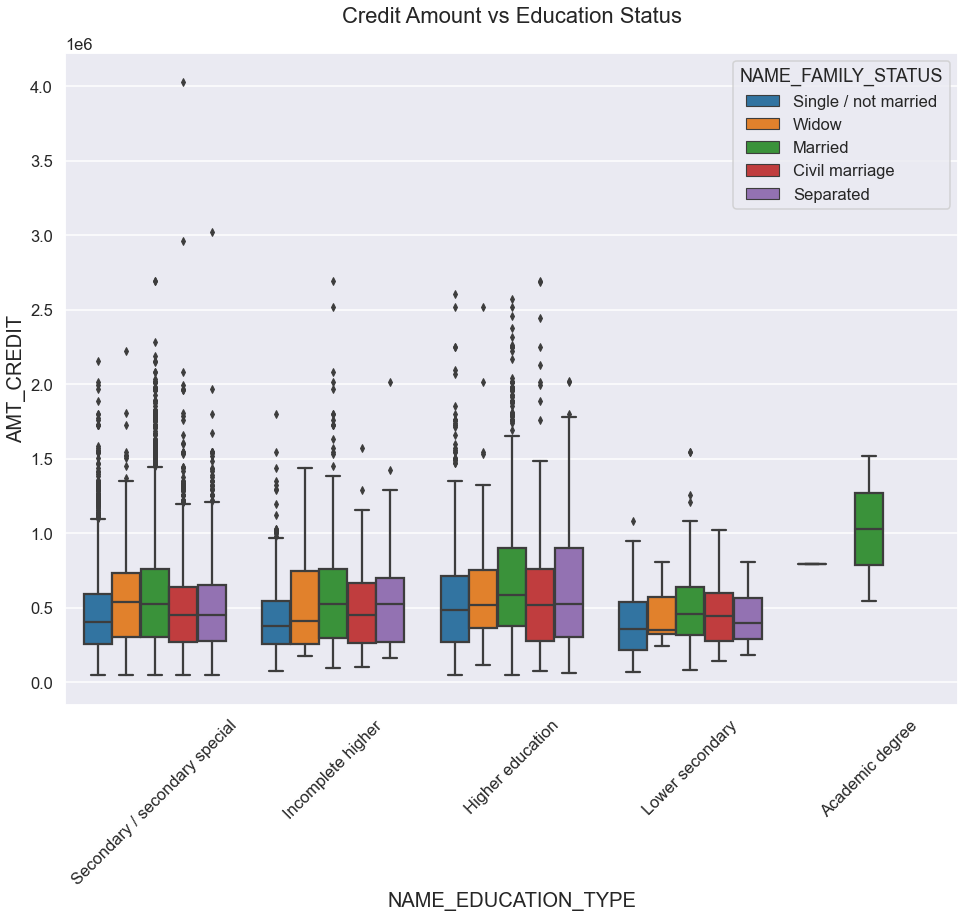

In [222]:
# Box plotting for credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

#### Graph Analysis
Observations from the above graph are:
    
* Most of the outliers are present in education type 'Secondary' and 'Higher education'.
* Family status of 'Married', 'Separated' and 'civil marriage' of 'Higher education' are having higher number of credits than others. 
* 'Separated' for 'Higher education' is having most of the credits in the third quartile.

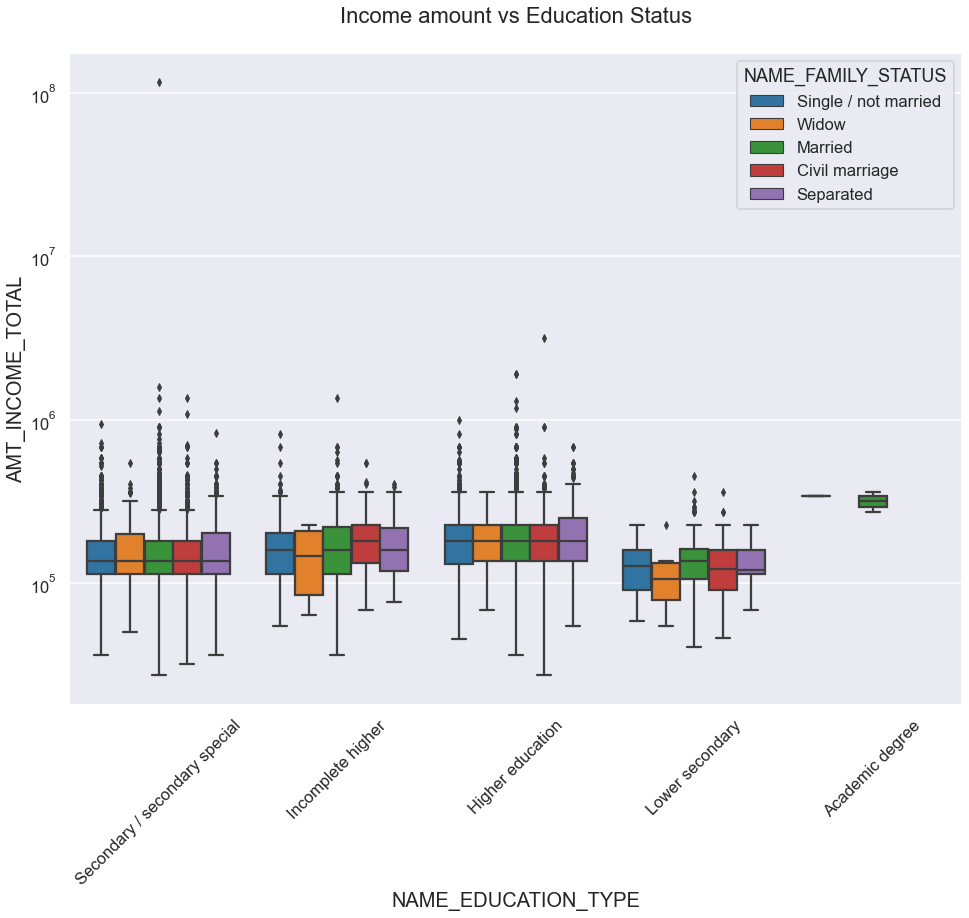

In [223]:
# Box plotting for Income amount in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Graph Analysis
Observations from the above graph are:

* income amount is mostly equal with family status. 
* Less outlier are having for Academic degree but there income amount is little higher that Higher education.
* Lower secondary are have less income amount than others.

#### Previous Application Dataset

In [224]:
# Reading the dataset of previous application
previous_application_df = pd.read_csv(r"C:\Users\Santhosh\Downloads\Credit EDA Case Study\previous_application.csv")

In [227]:
previous_application_df.shape

(1670214, 37)

#### There are 1670214 rows and 37 columns

In [235]:
# Cleaning the missing data

# listing the null values columns having more than 30%

empty_col=previous_application_df.isnull().sum()
empty_col=empty_col[empty_col.values>(0.3*len(empty_col))]
len(empty_col)

15

#### There are 15 columns having null values greater than 30%

In [236]:
type(empty_col)

pandas.core.series.Series

In [237]:
# Convert empty_col from Series to list
empty_col = list(empty_col[empty_col.values>=0.3].index)

In [238]:
# Remove 15 columns having null values > 30%
previous_application_df.drop(labels=empty_col,axis=1,inplace=True)

In [239]:
# Find the shape of previous_application_df after removing the 15 columns
previous_application_df.shape

(1670214, 22)

#### After removing 15 columns new shape of previous_application_df is: 1670214 rows and 22 columns

In [247]:
# To check columns having values 'XNA' which means Not Available
previous_application_df.isin(['XNA']).any()

SK_ID_PREV                     False
SK_ID_CURR                     False
NAME_CONTRACT_TYPE              True
AMT_APPLICATION                False
AMT_CREDIT                     False
WEEKDAY_APPR_PROCESS_START     False
HOUR_APPR_PROCESS_START        False
FLAG_LAST_APPL_PER_CONTRACT    False
NFLAG_LAST_APPL_IN_DAY         False
NAME_CASH_LOAN_PURPOSE          True
NAME_CONTRACT_STATUS           False
DAYS_DECISION                  False
NAME_PAYMENT_TYPE               True
CODE_REJECT_REASON              True
NAME_CLIENT_TYPE                True
NAME_GOODS_CATEGORY             True
NAME_PORTFOLIO                  True
NAME_PRODUCT_TYPE               True
CHANNEL_TYPE                   False
SELLERPLACE_AREA               False
NAME_SELLER_INDUSTRY            True
NAME_YIELD_GROUP                True
dtype: bool

In [248]:
previous_application_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [250]:
# Removing 'XNA' and 'XNP' values from NAME_CASH_LOAN_PURPOSE column
previous_application_df=previous_application_df.drop(previous_application_df[previous_application_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_application_df=previous_application_df.drop(previous_application_df[previous_application_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [251]:
# Find the shape of previouse_application_df
previous_application_df.shape

(69635, 22)

#### New shape of previous_application_data is 69635 rows and 22 columns

### Merging application_data and previous_application_data 

In [284]:
# Merge application_data_df and previous_application_df
merged_df=pd.merge(left=application_data_df,right=previous_application_df,how='inner',on='SK_ID_CURR', suffixes= ('_','x'))

In [285]:
# Fetch the columns of merged_df dataset
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPEx', 'AMT_APPLICATION', 'AMT_CREDITx',
       'WEEKDAY_APPR_PROCESS_STARTx', 'HOUR_APPR_PROCESS_STARTx',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       '

In [286]:
# Renaming the column names after merging
new_merged_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [287]:
# Fetch the shape of new_merged_df before removing unwanted columns
new_merged_df.shape

(51420, 51)

In [288]:
# Removing unwanted columns for analysis
new_merged_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [289]:
new_merged_df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT_PREV', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'],
      dtype='object')

In [283]:
# Fetch the shape of new_merged_df
new_merged_df.shape

(51420, 38)

#### Performing Univariate Analysis

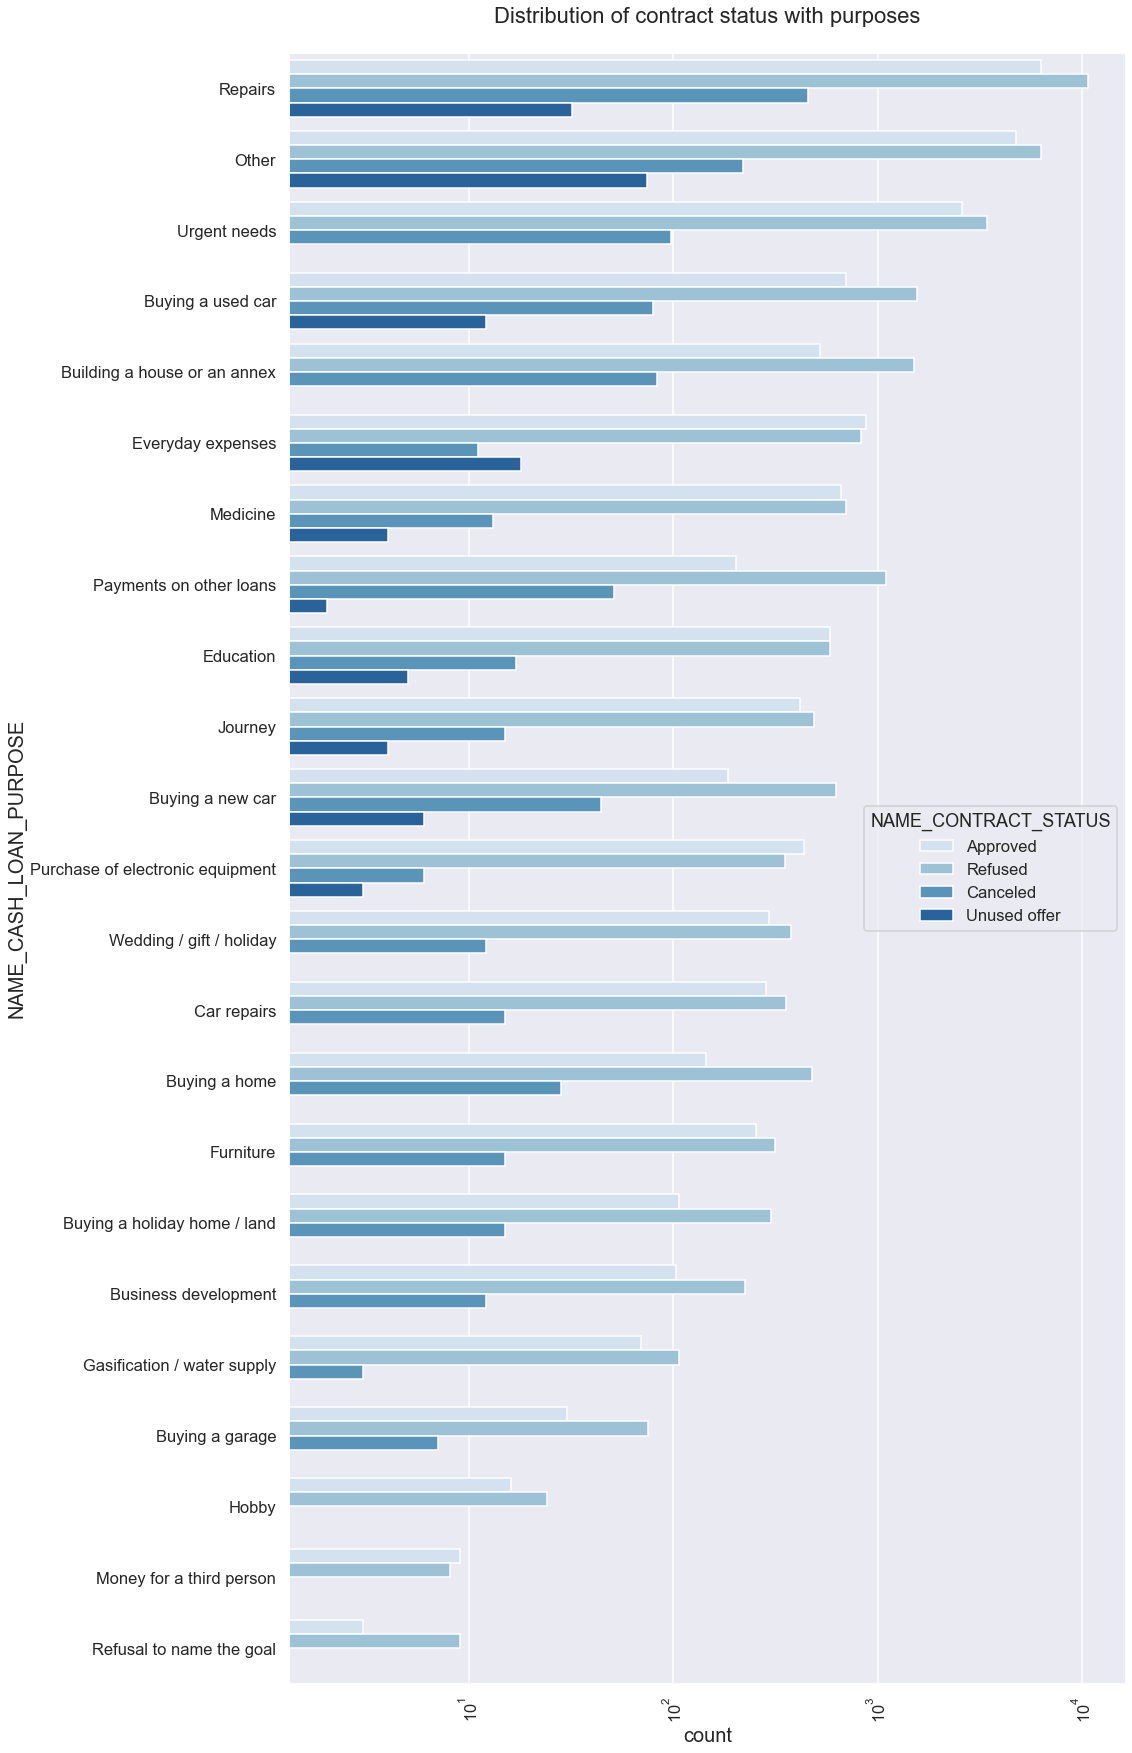

In [290]:
# Distribution of contract status in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='Blues') 

#### Graph Analysis
Observations from the above graph:

* Most rejection of loans came from purpose 'repairs'.
* For education purposes we have equal number of approvals and rejection
* 'Payment on other loans' and 'buying a new car' are having significant higher rejection than approvals

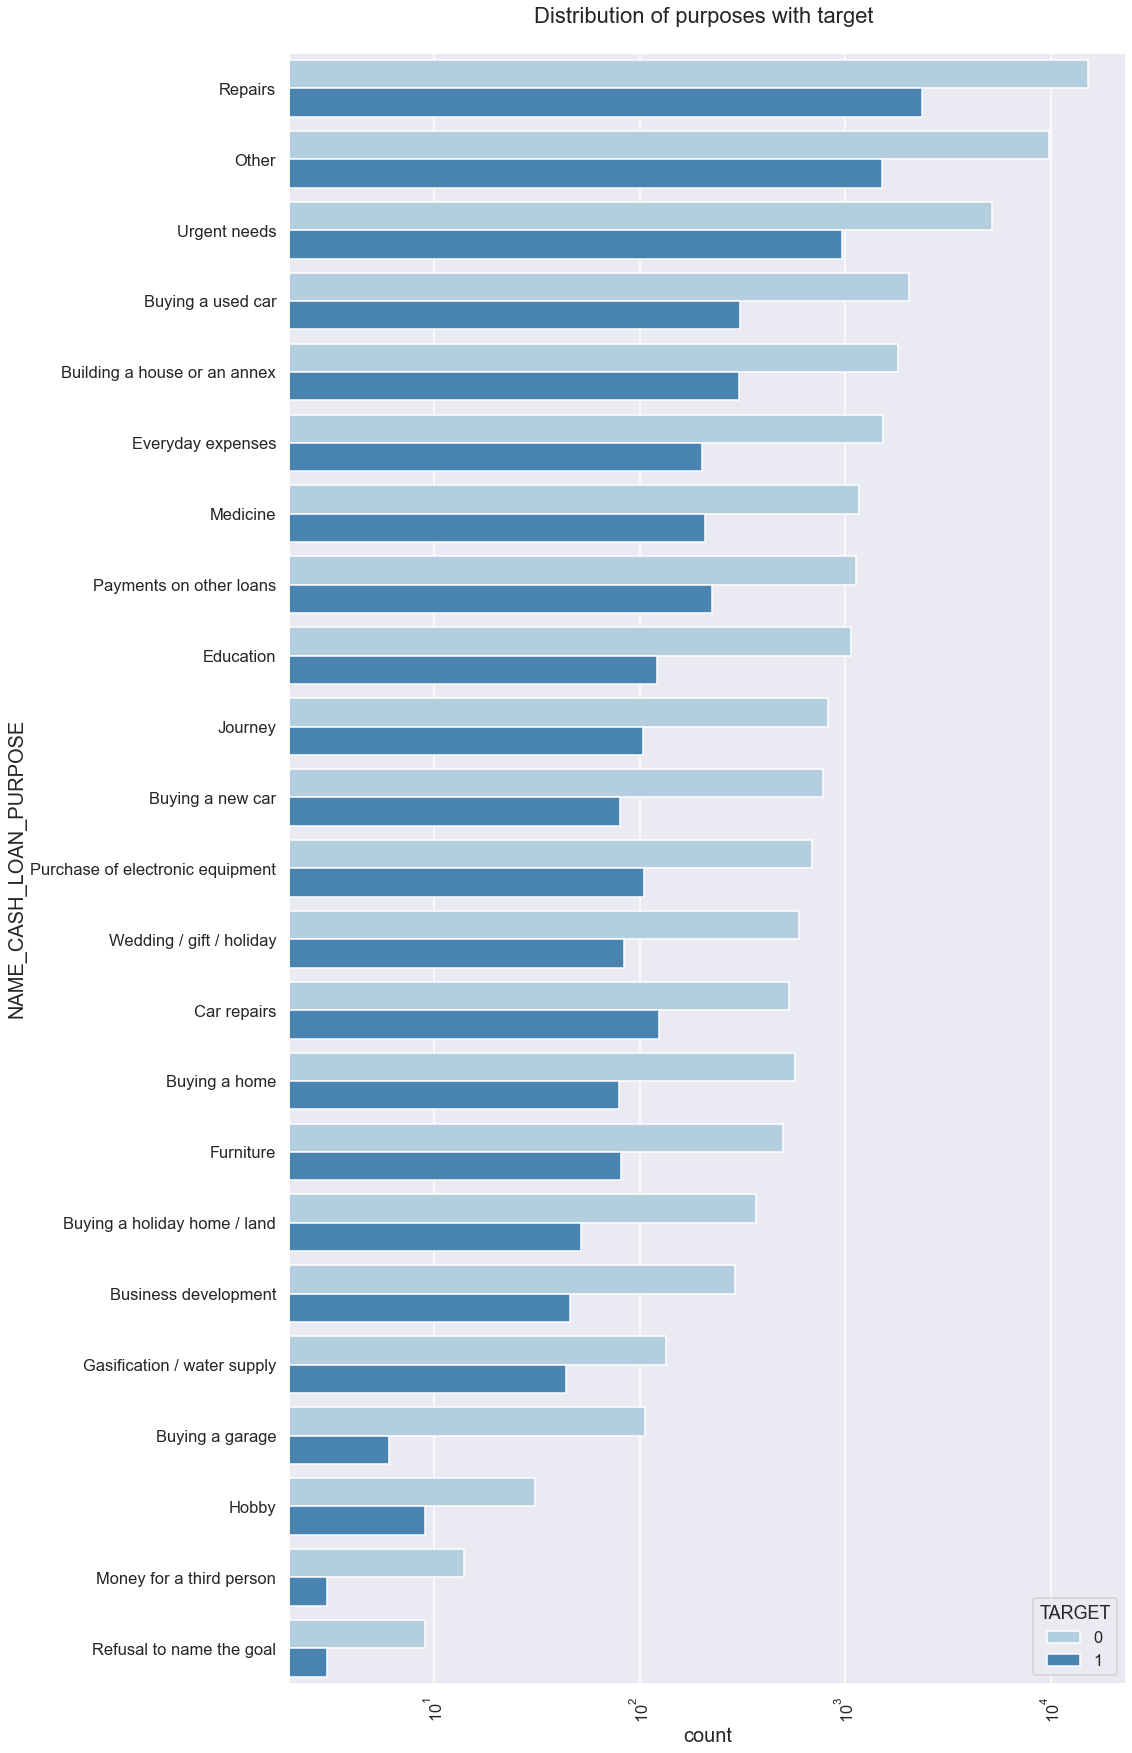

In [292]:
# Distribution of contract status

sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='Blues') 

#### Graph Analysis
Observations from the above graph:

* Loan purposes with 'Repairs' are facing more difficulites in payment on time.
* There are few places where loan payment is significantly higher than facing difficulties:
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
Hence, we can focus on these purposes for which the client is having minimal payment difficulties.

#### Performing Bivariate Analysis

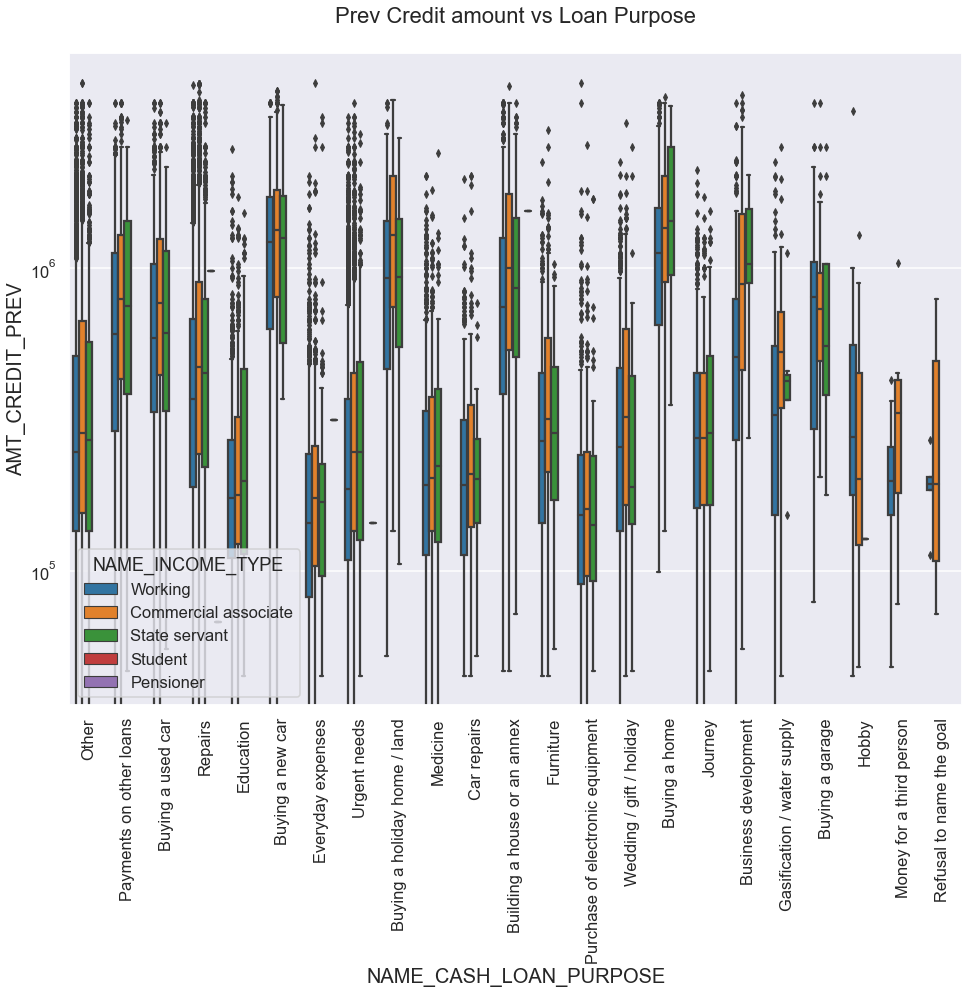

In [293]:
# Box plotting for Credit amount in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_merged_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### Graph Analysis
Observations from the above graph:

* The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
* Income type of state servants have a significant amount of credit applied
* 'Money for third person' and 'Hobby' are having less credits applied for.

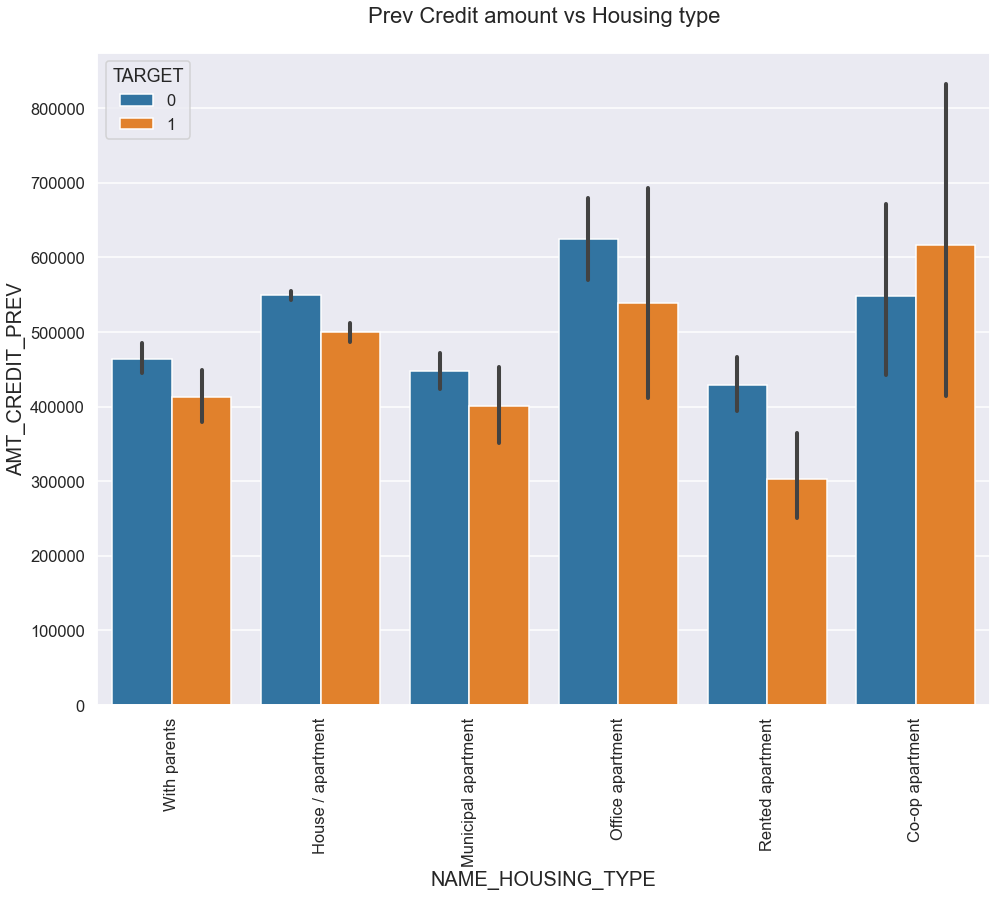

In [296]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = new_merged_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### Graph Analysis
Observations for the above graph:

* 'House / apartment', 'Office apartment' are having higher credit in target 0 
* 'Co-op apartment' is having higher credit in target 1.
* Based on the above analysis, Bank should avoid giving loans to the housing type of 'co-op apartment' as they are having difficulties in payment.
* Bank can focus mostly on housing type 'With parents', 'House / apartment' or 'Municipal apartment' for successful payments.

## Conclusion

* High Focus Area for Banks: 
    * Banks should focus more on contract type ‘Student’, ’pensioner’ and ‘Businessman’ with housing type other
      than ‘Co-op apartment’ for successful payments.
    * Banks should focus on clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.


* Less Focus Area for Banks:
    * Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
    * Loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.